# 美国牛油果销售数据集

## 简介

此数据集包含美国牛油果价格和销量的历史数据。很多时候牛油果是多个一起袋装出售，因此牛油果平均价格数据反映了单个牛油果的成本。
此数据集可以用于观察牛油果的历史价格变化，价格随季节的波动，或是不同地区的市场销量对比。

变量含义：
- `Date`：观察日期
- `AveragePrice` ：单个鳄梨的平均价格
- `type`：常规或有机
- `year`：年份
- `Region`：观测的城市或地区
- `Total Volume`：鳄梨的总销售量
- `4046`：售出PLU为4046的鳄梨总数
- `4225`：售出PLU为4225的鳄梨总数
- `4770`：售出PLU为4770的鳄梨总数

## **读取数据**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv("./avocado.csv")

In [3]:
original_data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
original_data = original_data.drop('Unnamed: 0', axis=1)

## **评估和清理数据**

In [5]:
cleaned_data = original_data.copy()

In [6]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [7]:
# 检查重复值
cleaned_data.duplicated().sum()

0

In [8]:
# 检查缺失值
cleaned_data.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [9]:
# Date列 转换为datatime类型
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])

In [10]:
# type列 转换为category
cleaned_data['type'] = cleaned_data['type'].astype('category')

In [13]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  category      
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 1.7+ MB


## **数据分析**

分析牛油果的 `AveragePrice` 随时间的变化，观察价格是否有季节性波动。

In [16]:
# 按日期汇总平均价格
groupby_date = cleaned_data.groupby('Date')['AveragePrice'].mean()

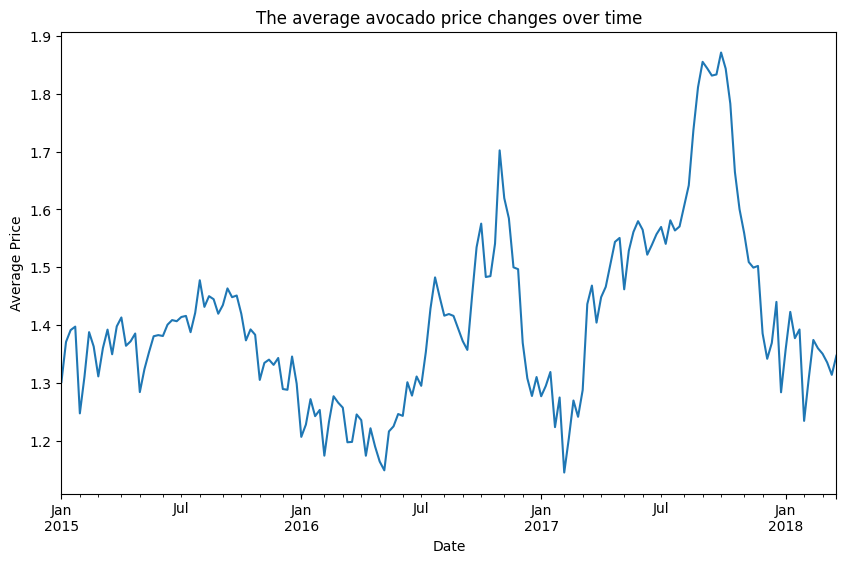

In [17]:
# 绘制价格随时间变化的图
plt.figure(figsize=(10, 6))
groupby_date.plot()
plt.title('The average avocado price changes over time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

比较不同地区的牛油果销量`Total Volume`，看看哪些地区销量更高。

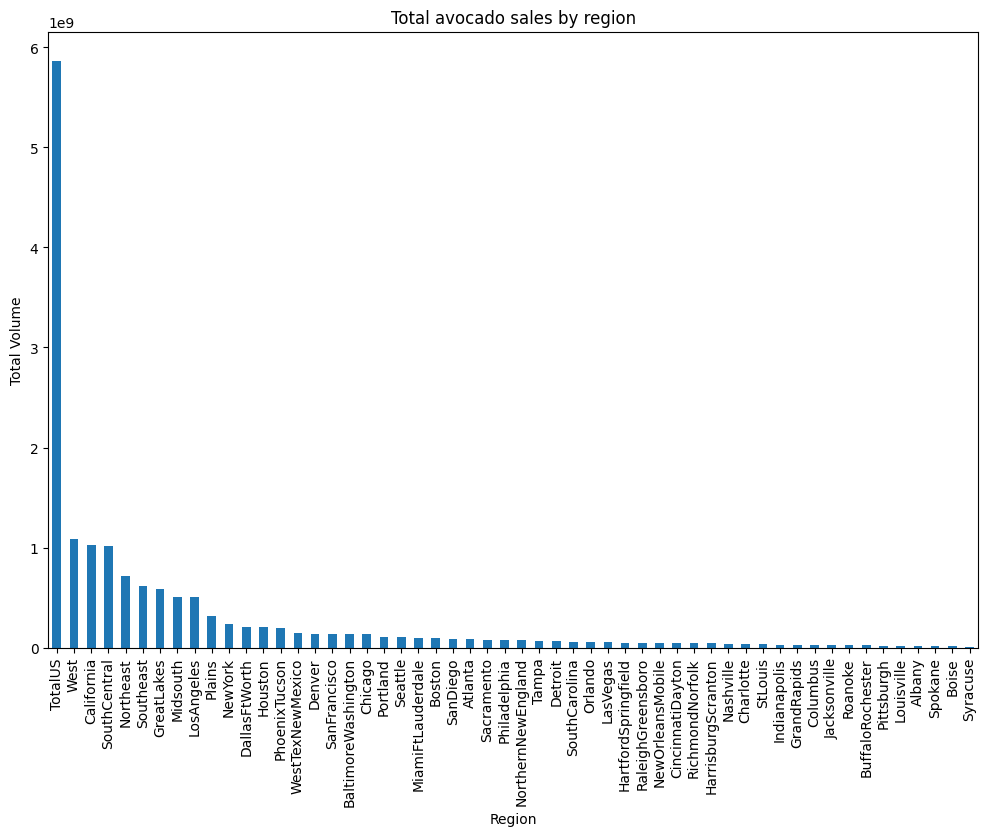

In [24]:
# 按地区汇总总销量
region_volume = cleaned_data.groupby('region')['Total Volume'].sum().sort_values(ascending=False)

# 绘制地区销量条形图
plt.figure(figsize=(12, 8))
region_volume.plot(kind='bar')
plt.title('Total avocado sales by region')
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.show()

分析常规牛油果与有机牛油果`type`的价格差异

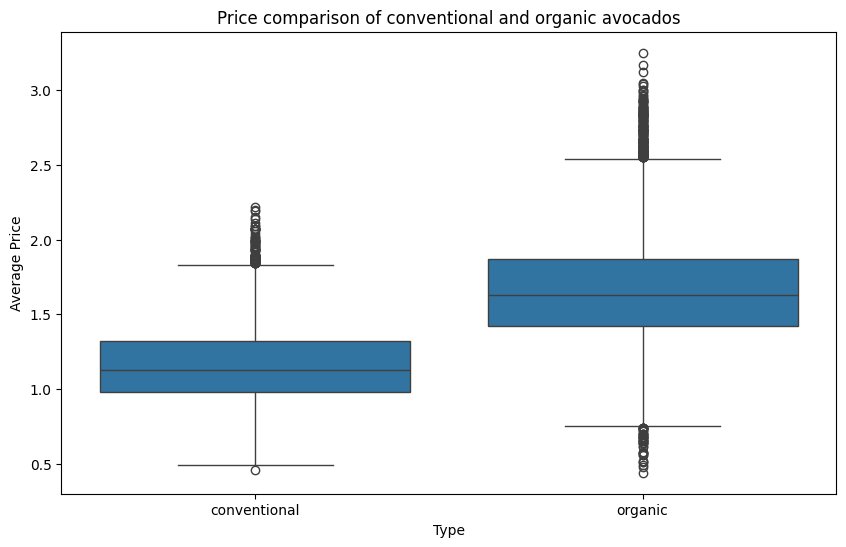

In [27]:
# 绘制不同类型牛油果的价格箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='AveragePrice', data=cleaned_data)
plt.title('Price comparison of conventional and organic avocados')
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.show()

分析牛油果价格在不同年份的变化趋势，观察是否有显著增长或下降。

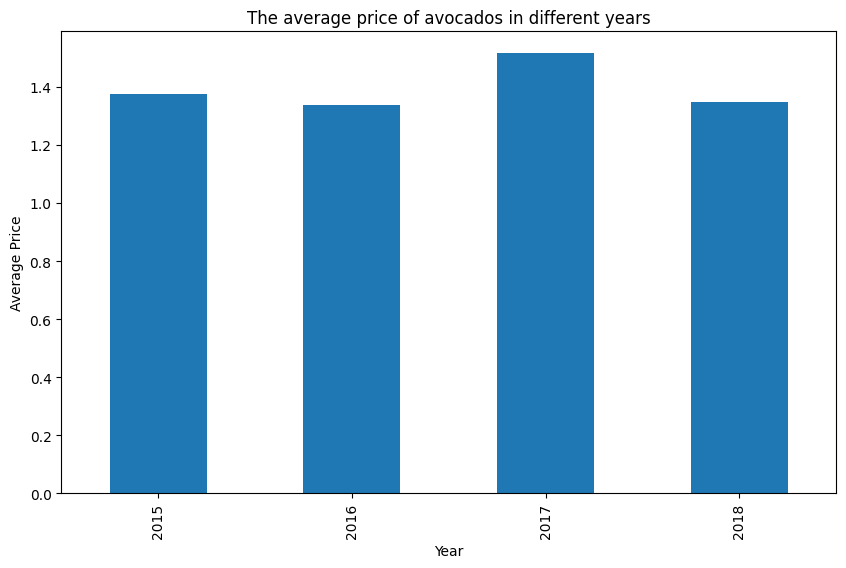

In [28]:
# 按年份汇总平均价格
year_price = cleaned_data.groupby('year')['AveragePrice'].mean()

# 绘制年份与平均价格的关系
plt.figure(figsize=(10, 6))
year_price.plot(kind='bar')
plt.title('The average price of avocados in different years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()


分别分析PLU为4046、4225、4770的牛油果销量，了解不同品种的销量情况。

<Figure size 1000x600 with 0 Axes>

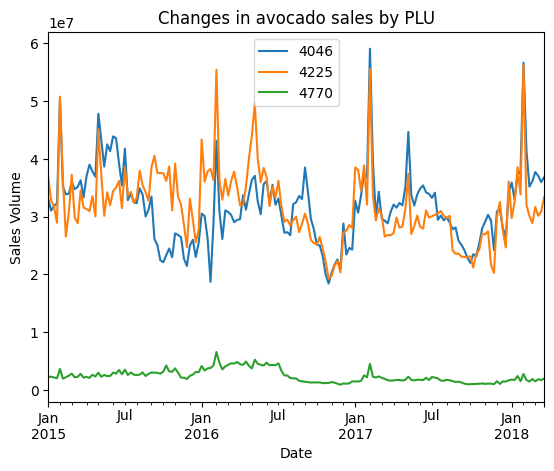

In [30]:
# 绘制不同PLU码的销量随时间变化趋势
plt.figure(figsize=(10, 6))
cleaned_data.groupby('Date')[['4046', '4225', '4770']].sum().plot()
plt.title('Changes in avocado sales by PLU')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.show()
